## HESA

- I Wayan Adi Saputra

In [1]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [2]:
#Load dataset
df = pd.read_csv('./dataset/PetaBencana_Dataset.csv')
df

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,01/01/2020,0:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,10.676.866,-616.978
1,95061,01/01/2020,0:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,10.697.870,-617.944
2,95062,01/01/2020,1:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,10.689.100,-623.449
3,95063,01/01/2020,1:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,10.716.189,-630.170
4,95064,01/01/2020,1:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,10.686.092,-616.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,299721,28/12/2021,01:23:43.144,grasp,confirmed,8f41806c-9d86-47a8-b52a-28cf0ec0a0be,https://images.petabencana.id/8f41806c-9d86-47...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,6.404054e+09,6404054.0,6404.0,64.0,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,1.176.655.040,13.510.431
4231,299723,28/12/2021,08:00:13.901,grasp,confirmed,d1bcdbc7-1819-41aa-b5fe-34d0162bb084,NaN,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }","{ ""district_id"": ""3173"", ""local_area_id"": ""678...",...,3.173070e+09,3173070.0,3173.0,31.0,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,1.068.276.215,-61.573.981
4232,299724,28/12/2021,10:49:48.763,grasp,confirmed,ee548663-23ad-4adb-8d85-f8c64b1fbb6c,https://images.petabencana.id/ee548663-23ad-4a...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.207111e+09,3207111.0,3207.0,32.0,Purwajaya,Purwadadi,Ciamis,Jawa Barat,1.086.955.703,-74.600.767
4233,299726,29/12/2021,07:22:30.000,detik,confirmed,https://pasangmata.detik.com/contribution/363227,https://akcdn.detik.net.id/community/pasma/202...,flood,NaN,"{ ""district_id"": ""3172"", ""local_area_id"": ""267...",...,3.172040e+09,3172040.0,3172.0,31.0,Cipinang Melayu,Makasar,Jakarta Timur,Daerah Khusus Ibukota Jakarta,1.069.163.134,-62.516.120


In [3]:
#drop irrelevant
df = df.drop(columns=['pkey', 'date', 'time', 'source', 'status', 'url', 'image_url', 'report_dat', 'tags', 'title', 'ID_Desa', 'ID_Kec', 'ID_Kab', 'ID_Prov', 'Kecamatan', 'Kabupaten', 'Provinsi', 'long', 'lat'])
df

,disaster_type,Desa
0,flood,Duri Kepa
1,flood,Pejuang
2,flood,Cipinang Muara
3,flood,Mekarmukti
4,flood,Cempaka Baru
...,...,...
4230,flood,Karangan Hilir
4231,flood,Karang Anyar
4232,flood,Purwajaya
4233,flood,Cipinang Melayu


In [4]:
#grouping each disaster
data = pd.DataFrame(df.groupby(['disaster_type', 'Desa'])['disaster_type'].size())
data.columns = ['total']
data = data.reset_index()

In [5]:
data['flood']  = np.where(data['disaster_type'] == 'flood'  , data['total'], 0)
data['earthquake']= np.where(data['disaster_type'] == 'earthquake', data['total'], 0)
data['wind']= np.where(data['disaster_type'] == 'wind', data['total'], 0)
data['volcano']= np.where(data['disaster_type'] == 'volcano', data['total'], 0)
data['fire']= np.where(data['disaster_type'] == 'fire', data['total'], 0)
data['haze']= np.where(data['disaster_type'] == 'haze', data['total'], 0)
data.drop(columns=['disaster_type'], inplace=True)
data

,Desa,total,flood,earthquake,wind,volcano,fire,haze
0,Abang,1,0,1,0,0,0,0
1,Adipala,1,0,1,0,0,0,0
2,Aek Unsin,1,0,1,0,0,0,0
3,Bajeng,1,0,1,0,0,0,0
4,Baleendah,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1257,Sumurpanggang,1,0,0,1,0,0,0
1258,Sunggal Kanan,1,0,0,1,0,0,0
1259,Tanjung Rejo,1,0,0,1,0,0,0
1260,Tugu Utara,1,0,0,1,0,0,0


In [6]:
#split categoril type (Desa) into cat and codes
kode, desa = pd.factorize(data['Desa'])
data['Desa'] = kode
data.drop(columns=['total'],inplace=True)

In [7]:
#standardization data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
dataset = pd.DataFrame(scaled_data, columns=data.columns)
dataset

,Desa,flood,earthquake,wind,volcano,fire,haze
0,-1.675629,-0.518428,1.708676,-0.200987,-0.082475,-0.052194,-0.039841
1,-1.672835,-0.518428,1.708676,-0.200987,-0.082475,-0.052194,-0.039841
2,-1.670041,-0.518428,1.708676,-0.200987,-0.082475,-0.052194,-0.039841
3,-1.667247,-0.518428,1.708676,-0.200987,-0.082475,-0.052194,-0.039841
4,-1.664453,-0.518428,1.708676,-0.200987,-0.082475,-0.052194,-0.039841
...,...,...,...,...,...,...,...
1257,1.724717,-0.518428,-0.192866,3.825131,-0.082475,-0.052194,-0.039841
1258,1.727511,-0.518428,-0.192866,3.825131,-0.082475,-0.052194,-0.039841
1259,1.730306,-0.518428,-0.192866,3.825131,-0.082475,-0.052194,-0.039841
1260,1.492812,-0.518428,-0.192866,3.825131,-0.082475,-0.052194,-0.039841


In [8]:
#getting matrix of dataframe
X = dataset.iloc[:, [0, 1]].values

m = X.shape[0]
n = X.shape[1]

#number of iteration
n_iter = 100

#number of cluster
k = 3

#determine centroid
centroid = np.array([]).reshape(n,0)
for i in range(k):
    rand = rd.randint(0, m-1)
    centroid = np.c_[centroid,X[rand]]
output = {}

#count euclidian distance
euclidDist = np.array([]).reshape(m,0)
for i in range(k):
    tempDist = np.sum((X-centroid[:,i])**2, axis=1)
    euclidDist = np.c_[euclidDist, tempDist]

c = np.argmin(euclidDist,axis=1)+1
centroid

array([[ 0.76915579,  0.09020409,  1.69118895],
       [-0.35502732, -0.35502732, -0.51842793]])

In [9]:
#k-means clustering algorithm
for i in range(n_iter):
    euclidDist = np.array([]).reshape(m,0)
    for i in range(k):
        tempDist = np.sum((X-centroid[:,i])**2, axis=1)
        euclidDist = np.c_[euclidDist, tempDist]

    c = np.argmin(euclidDist,axis=1)+1
    y = {}
    for j in range(k):
        y[j+1] = np.array([]).reshape(2,0)
    for j in range(m):
        y[c[j]] = np.c_[y[c[j]], X[j]]
    for j in range(k):
        y[j+1] = y[j+1].T
    for j in range(k):
        centroid[:,j] = np.mean(y[j+1], axis=0)
    output = y

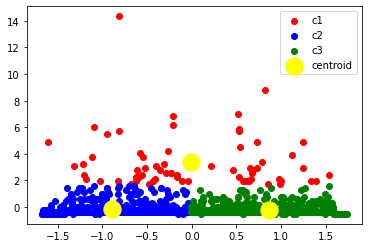

In [10]:
#visualization cluster
color = ['red', 'blue', 'green']
labels = ['c1', 'c2', 'c3']
for i in range(k):
    plt.scatter(output[i+1][:,0], output[i+1][:,1], c = color[i], label=labels[i])
plt.scatter(centroid[0,:], centroid[1,:], s=300, c='yellow', label='centroid')

plt.legend()
plt.show()

In [11]:
#clustered data
newdata = pd.DataFrame(data)
newdata['cluster'] = c
newdata['Desa'] = desa[kode]
newdata

,Desa,flood,earthquake,wind,volcano,fire,haze,cluster
0,Abang,0,1,0,0,0,0,2
1,Adipala,0,1,0,0,0,0,2
2,Aek Unsin,0,1,0,0,0,0,2
3,Bajeng,0,1,0,0,0,0,2
4,Baleendah,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...
1257,Sumurpanggang,0,0,1,0,0,0,3
1258,Sunggal Kanan,0,0,1,0,0,0,3
1259,Tanjung Rejo,0,0,1,0,0,0,3
1260,Tugu Utara,0,0,1,0,0,0,3


In [14]:
#total each cluster
pd.value_counts(newdata['cluster'])

3    607
2    589
1     66
Name: cluster, dtype: int64

## Summary

Berdasarkan hasil analisis yang dilakukan bencana alam yang sering terjadi adalah bencana banjir yaitu sekitar 4000an kasus kemudian bencana gempa sekitar 200an kasus dan sisanya adalah bencana gungung meletus, angin kencang, dan kebakaran. Bencana yang terjadi dapat diklusterisasikan menjadi 3 jenis kluster yaitu kluster pertama (c1): tingkat rawan bencana ringan, kluster kedua(c2): tingkat rawan bencana sedang, dan kluster ketiga (c3): tingkat rawan bencana tinggi.

Daerah yang termmasuk kedalam kluster 3 (tingkat rawan bencana tinggi) yaitu daerah DKI Jakarta dan Jawa Barat dengan bencana terbanyak adalah banjir.Daerah yang termasuk kedalam kluster 2 (tingkat rawan bencana sedang) yaitu daerah Banten, Kalimantan selatan, Jawa Tengah dan sekitarnya, dan yang termasuk kedalam kluster 1 (tingkat rawan bencana sedang) adalah daerah Kalimantan Timur, Kalimantan Tengah, Sulawesi.

Frekuensi terjadinya bencana terbanyak yaitu pada bulan Januari sampai Februari, khusunya bencana banjir hal ini dikarenakan pada bulan merupakan puncaknya musim hujan di Indonesia.

Rekomendasi yang dapat diberikan:

1. Bagi Masyarakat: Masyarakat harus lebih waspada dengan potensi bencana yang terjadi khususnya pada bulan Januari sampai bulan Februari karena menjadi puncak musim hujan dan berpotensi terjadinya banjir seperti pada daerah Kepa, Rawa buaya dan sekitarnya.

undefined. Bagi Pemerintah: Pemerintah harus lebih siap siaga untuk mengantisipasi ternjadinya banjir ataupun bencana lain yang terjadi dengan melihat pengalaman yang terjadi pada tahun sebelumnya sehingga tingkat kerugian yang dialami dapat diminimalisir.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5796937-50eb-437b-95bb-507260916b44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>